# Visualize Dictionary Graph Using NetworkX

In [1]:
from graphipy.graphipy import GraphiPy

In [2]:
# create GraphiPy object
graphipy = GraphiPy("dictionary")

In [3]:
# The reddit API needs these credentials
CLIENT_ID = ""
CLIENT_SECRET = ""
USER_AGENT = ""
USERNAME = ""
PASSWORD = ""
reddit_api_credentials = {
    "client_id": CLIENT_ID,
    "client_secret": CLIENT_SECRET,
    "user_agent": USER_AGENT,
    "username": USERNAME,
    "password": PASSWORD
}

# create the reddit object
reddit = graphipy.get_reddit(reddit_api_credentials)

# Find Comments in a Submission

In [4]:
# Sample query
submission_id = "9uolpb"

submission_comments = reddit.fetch_submission_comments(graphipy.create_graph(), submission_id, limit=5)
sc_nodes = submission_comments.get_nodes()
sc_edges = submission_comments.get_edges()

# Visualization with NetworkX

In [5]:
# Create graph from dictionaries
nx_graph = graphipy.nx_create_from_dict(sc_nodes, sc_edges)

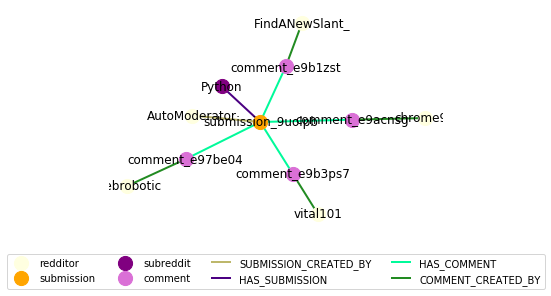

In [6]:
# Draw the graph
options = {
    "node_label": "Label",
    "colorful_edges": True
}
legend = graphipy.nx_draw_random(nx_graph, options=options, legend=True)